<a href="https://colab.research.google.com/github/shumshersubashgautam/AutismClassification/blob/main/EfficientNetB0_autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 6.0 MB/s eta 0:00:00


In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import efficientnet.tfkeras as efn
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense,Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.metrics import AUC, CategoricalAccuracy, Precision, Recall
import tensorflow as tf
import cv2
import random
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D

In [78]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00


In [80]:
train_path ='/content/autism/AutismDataset/train/'
test_path = '/content/autism/AutismDataset/train/'

In [81]:
file_names = np.array(os.listdir(train_path))
lable_name = []
file_path = []
for filename in file_names:
    category = filename.split('.')[0]
    file_path.append(train_path+ filename)
    if category == 'Autistic':
        lable_name.append('Autistic')
    else:
        lable_name.append('Non_Autistic')
train_df = pd.DataFrame({
    'file_path': file_path,
    'label_name': lable_name
})

In [82]:
file_names_test = np.array(os.listdir(test_path))
lable_name_test = []
file_path_test = []
for filename in file_names_test:
    category = filename.split('.')[0]
    file_path_test.append(train_path+ filename)
    if category == 'Autistic':
        lable_name_test.append('Autistic')
    else:
        lable_name_test.append('Non_Autistic')
test_df = pd.DataFrame({
    'file_path': file_path_test,
    'label_name': lable_name_test
})

In [83]:
train_df.head()

,file_path,label_name
0,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
1,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
2,/content/autism/AutismDataset/train/Autistic.3...,Autistic
3,/content/autism/AutismDataset/train/Autistic.8...,Autistic
4,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic


In [84]:
test_df.head()

,file_path,label_name
0,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
1,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
2,/content/autism/AutismDataset/train/Autistic.3...,Autistic
3,/content/autism/AutismDataset/train/Autistic.8...,Autistic
4,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic


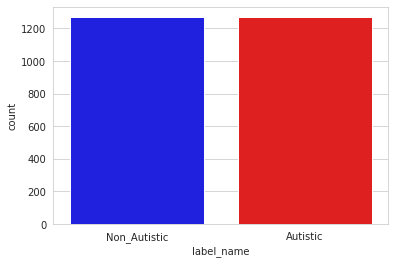

In [85]:
sns.set_palette(sns.color_palette(["b", "r"]))
sns.countplot(x =train_df['label_name'])
plt.show()

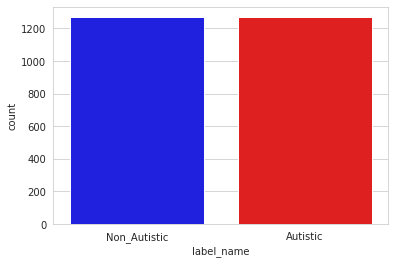

In [86]:
sns.set_palette(sns.color_palette(["b", "r"]))
sns.countplot(x =test_df['label_name'])
plt.show()

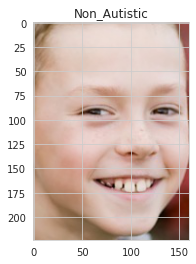

In [87]:
sample = random.choice(file_path)
image = plt.imread(sample)
plt.title(sample.split('/')[-1].split('.')[0])
plt.imshow(image)
plt.show()

In [88]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input
#     preprocessing_function = efn.preprocess_input
)

# Only rescaling the val set
val_gen = ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input
#     preprocessing_function = efn.preprocess_input
)

In [89]:
image_size = 224
input_shape = (image_size, image_size, 3)
epochs = 30
batch_size = 20

In [90]:
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
total_train,total_validate

(2286, 254)

In [91]:
train_df.head()

,index,file_path,label_name
0,1639,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
1,1006,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
2,1993,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
3,2058,/content/autism/AutismDataset/train/Autistic.1...,Autistic
4,1351,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic


In [92]:
validate_df.head()

,index,file_path,label_name
0,1145,/content/autism/AutismDataset/train/Autistic.2...,Autistic
1,1606,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
2,1699,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
3,323,/content/autism/AutismDataset/train/Autistic.5...,Autistic
4,209,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic


In [93]:
train_set = train_gen.flow_from_dataframe(
    train_df, 
    x_col='file_path',
    y_col='label_name',
    target_size=(image_size,image_size), 
    class_mode='categorical', 
    shuffle=True, 
    batch_size=batch_size)
val_set = val_gen.flow_from_dataframe(
    validate_df, 
    x_col='file_path',
    y_col='label_name',
    target_size=(image_size,image_size), 
    class_mode='categorical', 
    shuffle=True, 
    batch_size=batch_size)

Found 2286 validated image filenames belonging to 2 classes.
Found 254 validated image filenames belonging to 2 classes.


In [94]:
class_dict = {v:k for k,v in train_set.class_indices.items()}
class_dict

{0: 'Autistic', 1: 'Non_Autistic'}

In [95]:
train_set.image_shape,val_set.image_shape

((224, 224, 3), (224, 224, 3))

In [96]:
def see_examples(datagen, figsize=(16,16),nrows=4, ncols=4):
    fig, ax = plt.subplots(figsize=figsize, nrows=nrows, ncols=ncols)
    batch_idx = np.random.randint(low=0, high=len(datagen), size=(nrows,ncols))
    for i in range(nrows):
        for j in range(ncols):
            imgs, labels = datagen[batch_idx[i,j]]
            sample_idx = np.random.randint(low=0, high=len(imgs))
            img = imgs[sample_idx]
            label = labels[sample_idx]
            label = class_dict[np.argmax(label)]
            ax[i,j].axis('off')
            ax[i,j].imshow(img)
            ax[i,j].set_title(label)
    plt.show()

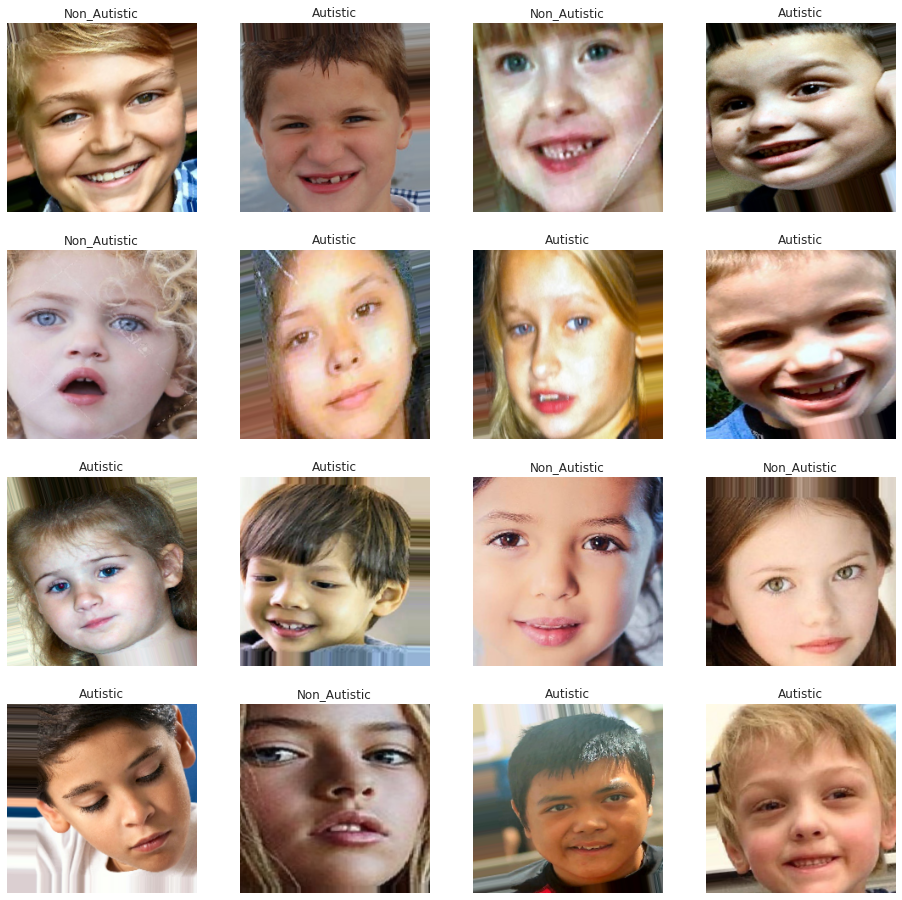

In [97]:
see_examples(train_set)

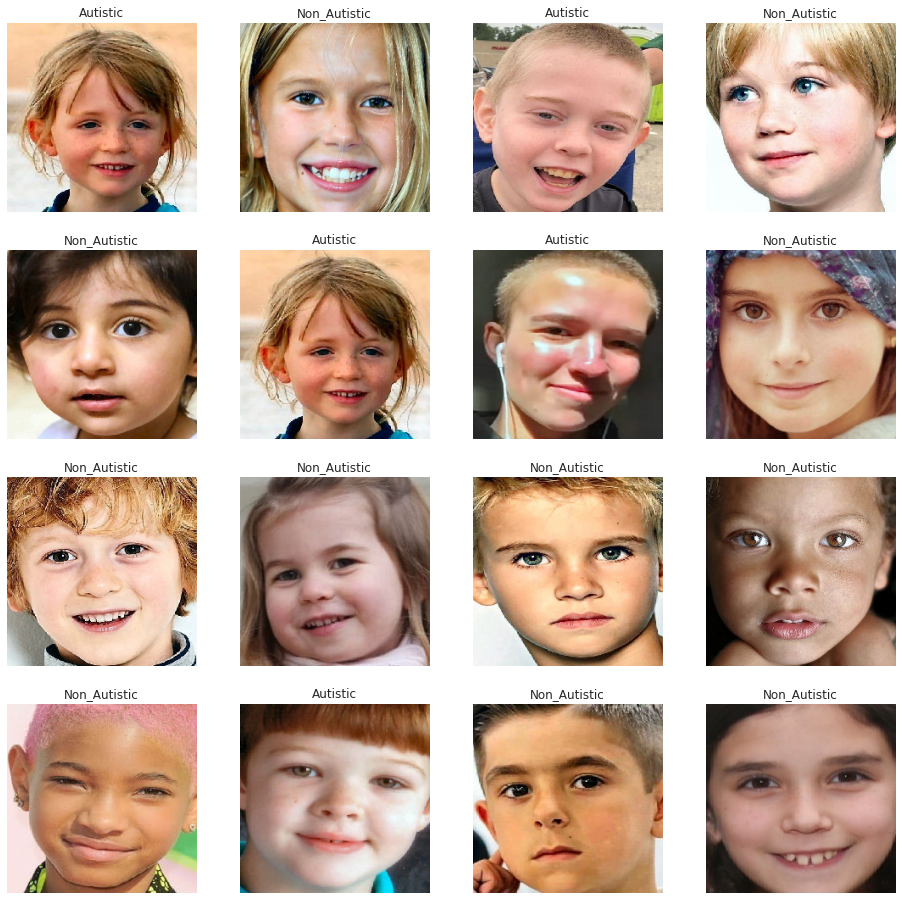

In [98]:
see_examples(val_set)

In [99]:
conv_base = efn.EfficientNetB0(input_shape=input_shape, include_top=False, weights="imagenet")
conv_base.trainable=True 

16804768/16804768 [==============================] - 2s 0us/step


In [100]:
input_shape

(224, 224, 3)

In [101]:
conv_base.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [102]:
model = Sequential([
    conv_base,
    GlobalMaxPooling2D(),
    
    Dense(units=512,activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    Dropout(0.2),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [104]:
callbacks = [
    EarlyStopping(min_delta=1e-5, patience=10),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

metrics = [
    CategoricalAccuracy(), 
#     F1Score(num_classes=2), 
#     Precision(), 
#     Recall(), 
#     AUC()
]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [105]:
history = model.fit_generator(train_set,epochs=epochs, steps_per_epoch=total_train//batch_size,
                  validation_data=val_set, validation_steps=total_validate//batch_size,callbacks= callbacks
                             )

<ipython-input-105-234de83ce516>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set,epochs=epochs, steps_per_epoch=total_train//batch_size,


Epoch 1/30
114/114 [==============================] - 49s 338ms/step - loss: 0.7569 - categorical_accuracy: 0.6624 - val_loss: 3.6409 - val_categorical_accuracy: 0.5833
Epoch 2/30
114/114 [==============================] - 37s 320ms/step - loss: 0.4811 - categorical_accuracy: 0.7798 - val_loss: 0.6562 - val_categorical_accuracy: 0.8042
Epoch 3/30
114/114 [==============================] - 37s 321ms/step - loss: 0.4250 - categorical_accuracy: 0.8094 - val_loss: 0.3836 - val_categorical_accuracy: 0.8208
Epoch 4/30
114/114 [==============================] - 37s 322ms/step - loss: 0.3711 - categorical_accuracy: 0.8420 - val_loss: 0.3303 - val_categorical_accuracy: 0.8250
Epoch 5/30
114/114 [==============================] - 36s 316ms/step - loss: 0.3923 - categorical_accuracy: 0.8310 - val_loss: 0.4583 - val_categorical_accuracy: 0.8167
Epoch 6/30
114/114 [==============================] - 38s 332ms/step - loss: 0.3445 - categorical_accuracy: 0.8597 - val_loss: 0.4392 - val_categorical_acc

KeyError: ignored

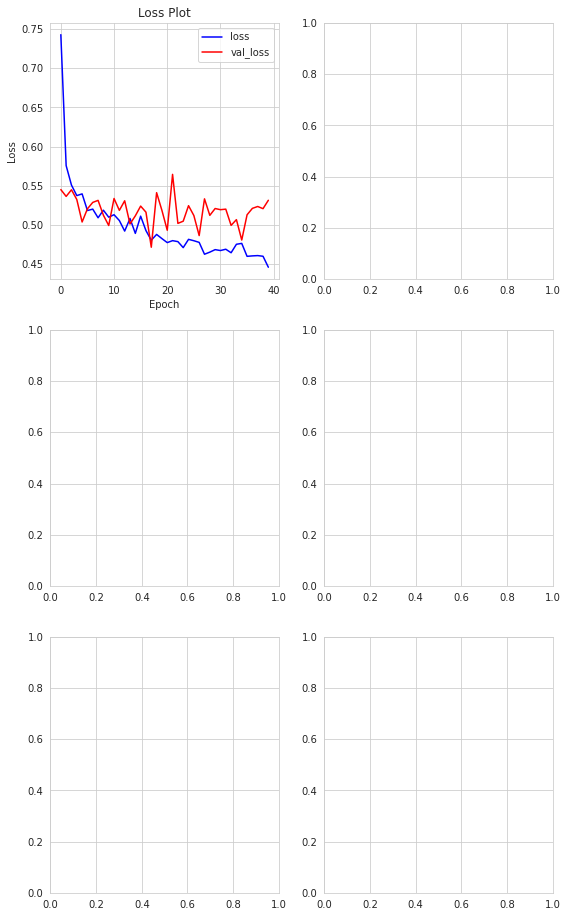

In [106]:
fig, ax = plt.subplots(figsize=(9,16), nrows=3,ncols=2)
history_df[['loss','val_loss']].plot(ax=ax[0,0], xlabel='Epoch',ylabel='Loss', title='Loss Plot')
history_df[['categorical_accuracy','val_categorical_accuracy']].plot(
    ax=ax[0,1], xlabel='Epoch',ylabel='Accuracy',title='Accuracy plot')
plt.show()

In [107]:
val_set_final = val_gen.flow_from_dataframe(
    test_df,x_col='file_path',
    y_col='label_name',
    class_mode='categorical',
    target_size=(image_size,image_size), 
    batch_size=batch_size, 
    shuffle=False)

Found 2540 validated image filenames belonging to 2 classes.


In [108]:
best_model = load_model('best_model.h5')

In [109]:
val_loss,val_acc = best_model.evaluate(val_set_final)
val_preds = best_model.predict(val_set_final)
val_preds = val_preds.argmax(axis=1)
test_df.head()

127/127 [==============================] - 11s 79ms/step


,file_path,label_name
0,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
1,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic
2,/content/autism/AutismDataset/train/Autistic.3...,Autistic
3,/content/autism/AutismDataset/train/Autistic.8...,Autistic
4,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic


In [110]:
val_set.class_indices

{'Autistic': 0, 'Non_Autistic': 1}

In [111]:
test_df['Label'] = test_df['label_name'].map(val_set.class_indices)
test_df['Predicted'] = val_preds
test_df.head()

,file_path,label_name,Label,Predicted
0,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic,1,1
1,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic,1,0
2,/content/autism/AutismDataset/train/Autistic.3...,Autistic,0,0
3,/content/autism/AutismDataset/train/Autistic.8...,Autistic,0,0
4,/content/autism/AutismDataset/train/Non_Autist...,Non_Autistic,1,1


In [112]:
conf_mat = confusion_matrix(y_true=test_df['Label'], y_pred=test_df['Predicted'])
conf_mat = pd.DataFrame(conf_mat, index=val_set_final.class_indices.keys(), columns=val_set_final.class_indices.keys())

In [113]:
conf_mat

,Autistic,Non_Autistic
Autistic,1207,63
Non_Autistic,78,1192


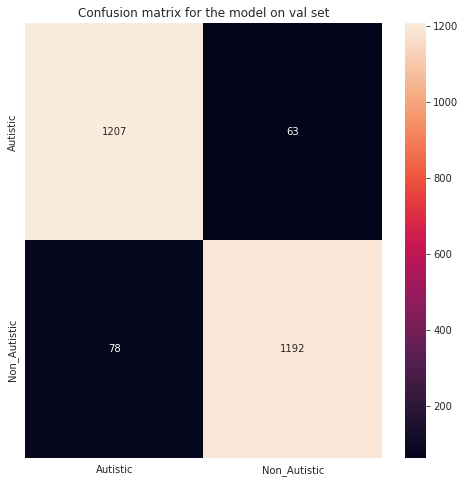

In [114]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, ax=ax , fmt='d')
ax.set_title('Confusion matrix for the model on val set')
plt.show()